<font size = "5"> **Chapter 2: [Introduction](../Introduction/CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Homework 2

<font size = "5"> Reading Microscopy Data</font>

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework02.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Homework/Homework02.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

**Spring 2024**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Khalid Hattar</td>
  </tr>
  <tr>
    <td>Microscopy Facilities</td> 
    <td> Tennessee Ion Beam Materials Laboratory </td>
  </tr>
  
  <tr>
    <td>Materials Science & Engineering</td>
    <td> Nuclear Engineering</td>
  </tr>
  <tr>
    <td>Institute of Advanced Materials & Manufacturing</td>
    <td> </td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>


Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load Packages

First we need to load the libraries we want to use. 
Here we use:
- numpy: numerical library
- matplotlib: graphic library
- pyTEMlib: TEM microsocpy library

All of those packages except pyTEMlib are provided by annaconda.

### Check Installed Packages
On your own computer you will have to install pyTRMlib only once, but in Google colab you'll have to run this cell every time.

In [2]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2024.02.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade SciFiReaders
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Load the plotting and pyTEMlib packages

In [7]:
%matplotlib  widget
import matplotlib.pylab as plt
import numpy as np
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library


# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__='CH1_04-Reading_File'
__notebook_version__='2024_01_09'

pyTEM version:  0.2023.9.1


## Open a file 

This function allows you to load any data file into the sid dataformat.
You can svae those data in a pyNSID file-format which enables you to keep track of your data analysis.

Please see the **[Installation](../Introduction/CH1_02-Prerequisites.ipynb#TEM-Library)** notebook for installation.


Please note that the plotting routine of ``matplotlib`` was introduced in **[Matplotlib and Numpy for Micrographs](../Introduction/CH1_03-Data_Representation.ipynb)** notebook.

In the first lab we used a sample with a carbon grid of a periodicity of 500 nm

f you run this notebook on your own computer you should download your images from the [google drive for 2023 Lab Data](https://drive.google.com/drive/folders/1RHcwbrBsxxJB_5cGgsNKPKAXcw2Y5GAo?usp=share_link), if you run it on google colab you can go to the drive directory in the dialog below. 

In any case:

> You must log into Google with your UTK account to be able to read these data.
>

Go to the folder of your data and select a file

In [8]:
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
fileWidget = ft.FileWidget()

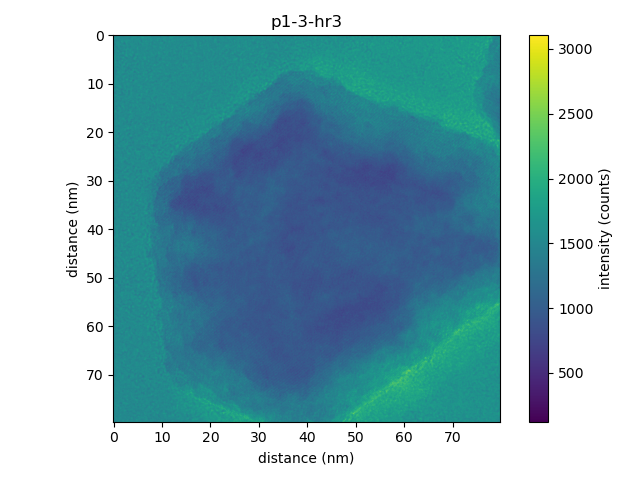

In [4]:
main_dataset = fileWidget.selected_dataset
figure = main_dataset.plot()

## Determination of Magnification  

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

15

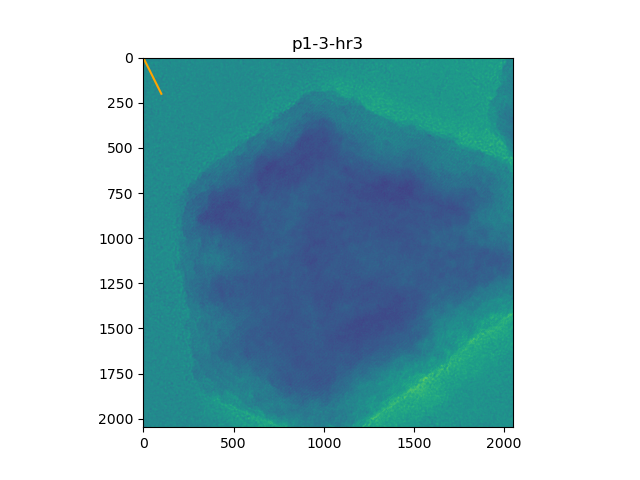

In [5]:
fig = plt.figure()

plt.imshow(main_dataset.T)
plt.title(main_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line 

In [6]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')

 The line is 1618.01pixels long
 The angle is 41.11 degrees


## Second Image

In [ ]:
second_fileWidget = ft.FileWidget()

<IPython.core.display.Javascript object>


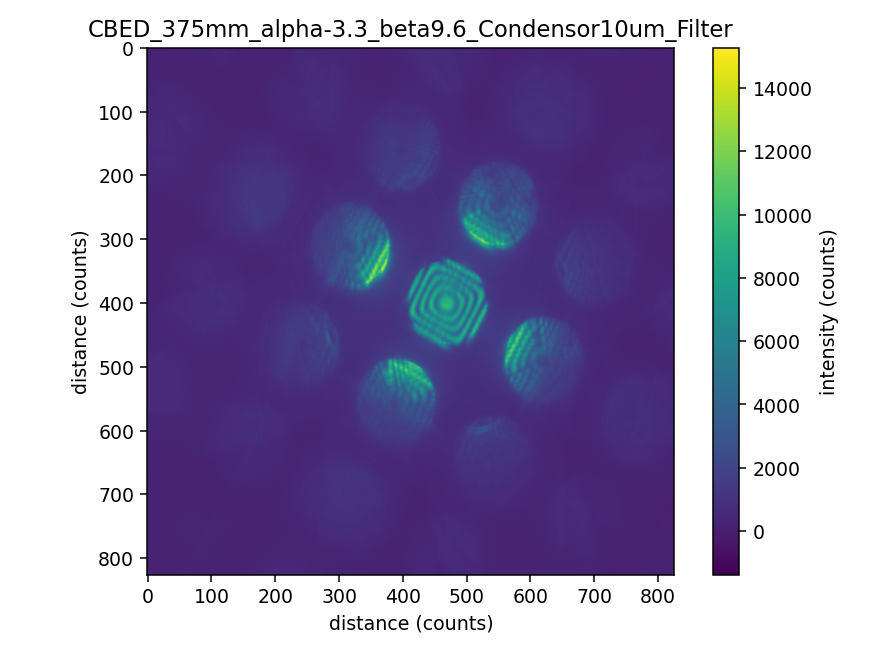

In [7]:
second_dataset = second_fileWidget.selected_dataset
view = second_dataset.plot()

## Determination of Magnification of Image 2

We plot the image in pixels and there will be a line to select the length of a feature.

Any Mouseclick will extend the line from the last click

<IPython.core.display.Javascript object>


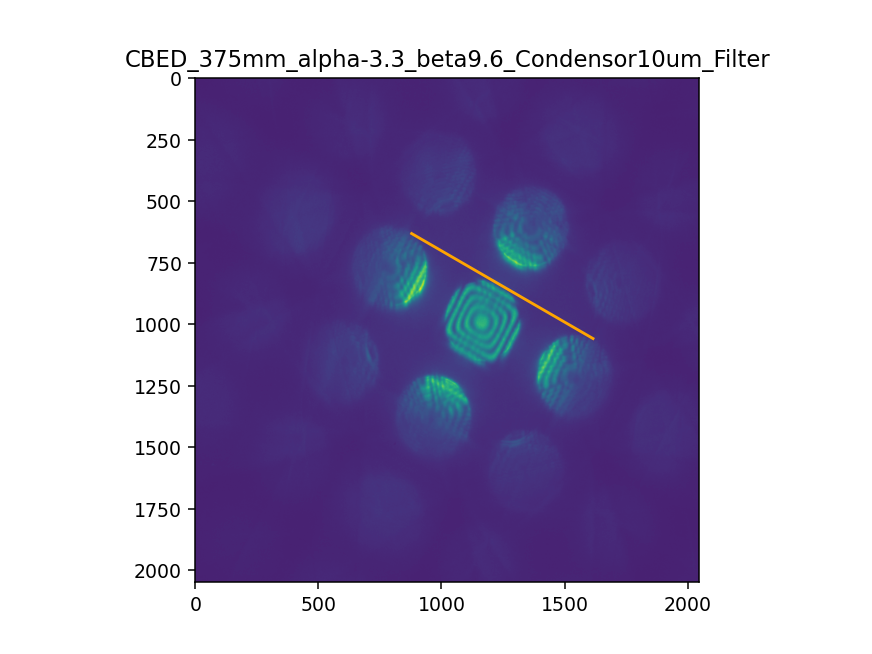

15

In [8]:
fig = plt.figure()

plt.imshow(second_dataset.T)
plt.title(second_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

## Length and Angle of Line of Image 2

In [9]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')

 The line is 851.57pixels long
 The angle is 30.07 degrees


## Questions

- What are the pixel sizes in the two images?
- What is the relative change in magnification with respect to pixel and with respect to indicated Magnification?
- What are the respective fields of view?

- What is the relative rotation?